# ⚛️ H₂ — Ground-State VQE vs Bond Length (Noiseless, UCCSD)

This notebook performs a **bond-length scan** for the hydrogen molecule **H₂**
using the production VQE API:

```python
from vqe.core import run_vqe_geometry_scan
```

We study how the **ground-state energy** varies as a function of the H–H bond
distance using a **UCCSD** ansatz (singles + doubles), which is the canonical
chemistry ansatz for H₂.

---

## Simulation setup

- Molecule: **H₂**
- Geometry: H–H bond length scan
- Distances: **0.5 Å → 2.5 Å** (21 points)
- Basis: **STO-3G**
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Device: `default.qubit`
- Noise: **None** (noiseless)

All heavy lifting (Hamiltonian construction, ansatz building, optimisation loop,
caching, and plotting) is handled entirely by the package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vqe.core import run_vqe_geometry_scan
from vqe_qpe_common.molecule_viz import plot_molecule


# 🧬 Bond-Length Grid

We define a simple one-dimensional scan over the H–H bond length.

In [ ]:
# H–H bond lengths in Ångström
bond_lengths = np.linspace(0.25, 2.50, 51)
print("Bond-length grid (Å):", bond_lengths)

Bond-length grid (Å): [0.25   0.8125 1.375  1.9375 2.5   ]


# 🚀 Run Geometry Scan via `run_vqe_geometry_scan`

`run_vqe_geometry_scan`:

- Uses the internal H₂ bond-length geometry helper (via `molecule="H2_BOND"`)
- Calls `run_vqe` under the hood for each bond length
- Reuses cached runs when available
- Produces a **Ground-state energy vs bond length** plot and saves it to disk

We use:
- Ansatz: **UCCSD**
- Optimizer: **Adam**
- Single seed: `0`
- 30 optimisation steps per geometry


⚙️ Geometry: bond = 0.250

📂 Found cached result: /workspaces/Variational_Quantum_Eigensolver/results/vqe/H2_BOND__UCCSD__Adam__VQE__noiseless__s0__d6fa68658448.json
  → Mean E = -0.312269 ± 0.000000 Ha

⚙️ Geometry: bond = 0.812
Step 01/50: E = -1.109016 Ha
Step 02/50: E = -1.131760 Ha
Step 03/50: E = -1.128760 Ha
Step 04/50: E = -1.121742 Ha
Step 05/50: E = -1.123446 Ha
Step 06/50: E = -1.129063 Ha
Step 07/50: E = -1.132679 Ha
Step 08/50: E = -1.132096 Ha
Step 09/50: E = -1.129264 Ha
Step 10/50: E = -1.127633 Ha
Step 11/50: E = -1.128551 Ha
Step 12/50: E = -1.130860 Ha
Step 13/50: E = -1.132641 Ha
Step 14/50: E = -1.132774 Ha
Step 15/50: E = -1.131608 Ha
Step 16/50: E = -1.130466 Ha
Step 17/50: E = -1.130382 Ha
Step 18/50: E = -1.131319 Ha
Step 19/50: E = -1.132445 Ha
Step 20/50: E = -1.132929 Ha
Step 21/50: E = -1.132571 Ha
Step 22/50: E = -1.131876 Ha
Step 23/50: E = -1.131539 Ha
Step 24/50: E = -1.131833 Ha
Step 25/50: E = -1.132459 Ha
Step 26/50: E = -1.132891 Ha
Step 27/50: E =

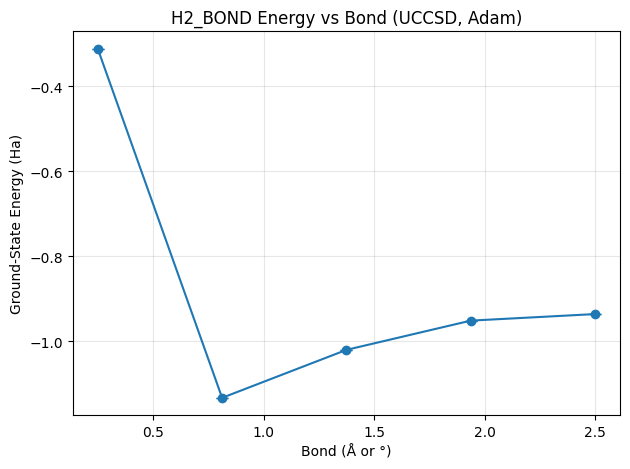

📁 Saved plot → /workspaces/Variational_Quantum_Eigensolver/images/vqe/H2_BOND/vqe_geometry_scan_bond_UCCSD_Adam.png
Minimum energy: -1.132925 ± 0.000000 at bond=0.812


In [3]:
results = run_vqe_geometry_scan(
    molecule="H2_BOND",
    param_name="bond",
    param_values=bond_lengths,
    ansatz_name="UCCSD",
    optimizer_name="Adam",
    steps=50,
    stepsize=0.2,
    seeds=[0],
    force=False,
    mapping="jordan_wigner",
    show=True,
)

# 📌 Extract Approximate Equilibrium Bond Length

`run_vqe_geometry_scan` returns a list of tuples:

$$
(r, \langle E \rangle, \sigma_E)
$$

where:
- $r$ is the bond length
- $\langle E \rangle$ is the mean ground-state energy over seeds
- $\sigma_E$ is the standard deviation

In [4]:
# Unpack results into arrays
params, mean_E, std_E = zip(*results)
params = np.array(params, dtype=float)
mean_E = np.array(mean_E, dtype=float)
std_E = np.array(std_E, dtype=float)

# Find approximate minimum
min_idx = int(np.argmin(mean_E))
r_opt = params[min_idx]
E_opt = mean_E[min_idx]
dE_opt = std_E[min_idx]

print(f"\nEstimated equilibrium bond length (H–H): {r_opt:.5f} Å")
print(f"Minimum VQE ground-state energy: {E_opt:.8f} ± {dE_opt:.8f} Ha")


Estimated equilibrium bond length (H–H): 0.81250 Å
Minimum VQE ground-state energy: -1.13292524 ± 0.00000000 Ha


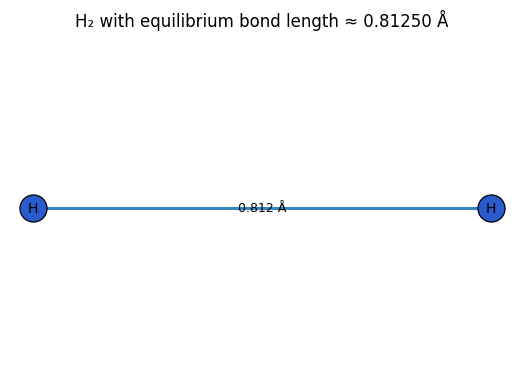

In [5]:
symbols = ["H", "H"]

coords = np.array([
    [0.0, 0.0, 0.0],
    [0.0, 0.0, r_opt],
])

plot_molecule(
    symbols,
    coords,
    title=f"H₂ with equilibrium bond length ≈ {r_opt:.5f} Å",
    bonds=[(0, 1)],
    angles=[],
    show_bond_lengths=True,
    show_atom_indices=False,
)
plt.show()


---
## Summary

In this notebook you:

- Used the **production VQE API** (`run_vqe_geometry_scan`) as a pure client
- Performed a **noiseless UCCSD VQE** bond-length scan for **H₂**
- Obtained a **Ground-state energy vs bond length** curve
- Extracted an approximate **equilibrium bond length** from the VQE data

All ansatz construction, Hamiltonian generation, device management,
optimisation, caching, and plotting were handled by the package.